In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\ADmIN\AppData\Local\Temp\ipykernel_14116\114752064.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


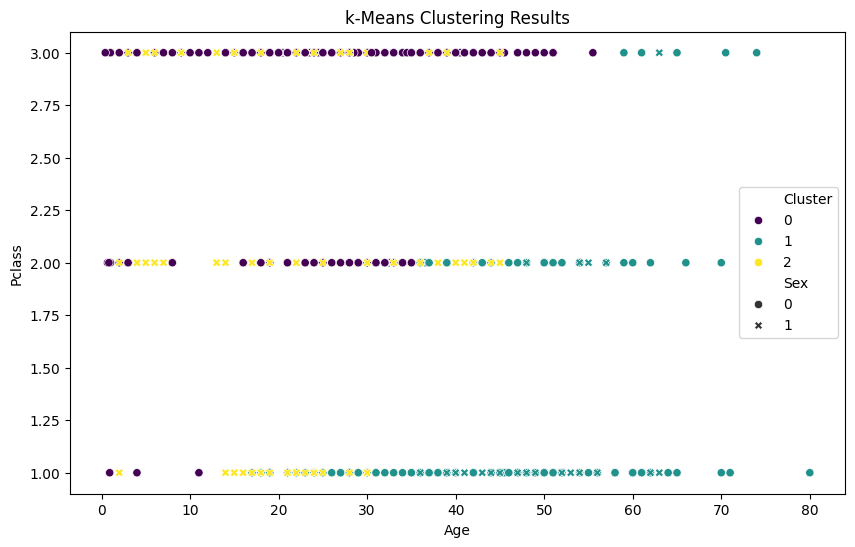

In [2]:

df = pd.read_csv('titanic.csv')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'].fillna(df['Age'].median(), inplace=True)
# Select relevant features for clustering
X = df[['Pclass', 'Age', 'Sex']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Age'], y=X['Pclass'], hue=df['Cluster'], palette='viridis', style=df['Sex'])
plt.title('k-Means Clustering Results')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.show()


In [3]:
# Apply k-Means with a chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels
df['Cluster'] = kmeans.labels_


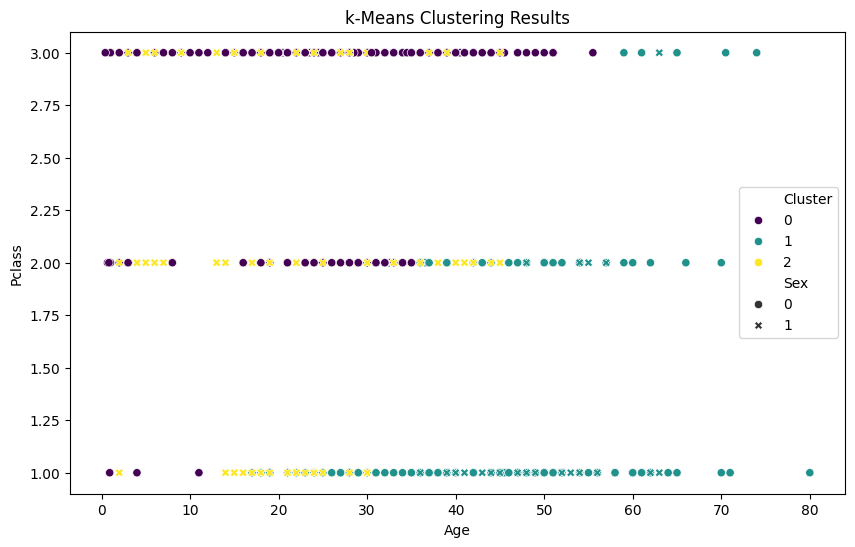

In [4]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Age'], y=X['Pclass'], hue=df['Cluster'], palette='viridis', style=df['Sex'])
plt.title('k-Means Clustering Results')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.show()


Evaluating CLuster Quality

In [5]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.45


Finding optimal number of clusters


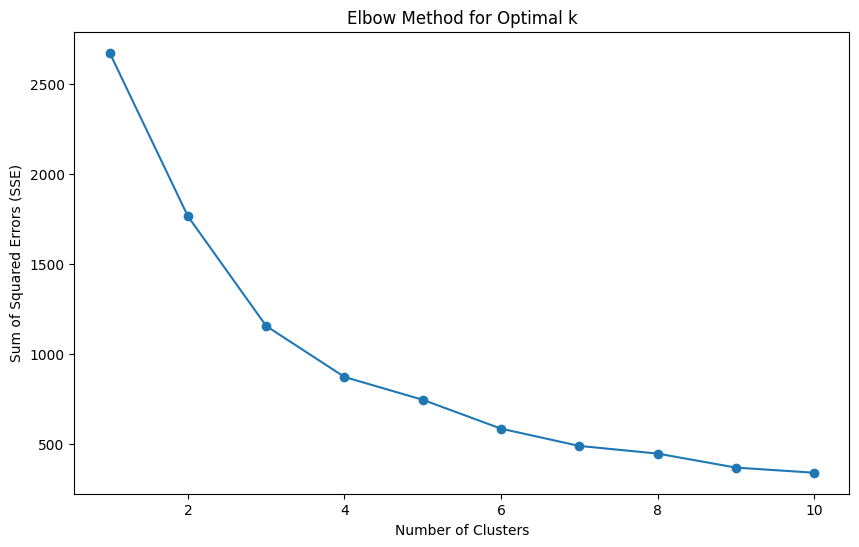

In [6]:
# Elbow method for choosing the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()
